In [1]:
%pylab inline
from fastai.vision import *
from pathlib import Path
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
path=Path('./data/')

In [3]:
path.ls()

[WindowsPath('data/Blouse'),
 WindowsPath('data/Dress'),
 WindowsPath('data/Jacket'),
 WindowsPath('data/Pant'),
 WindowsPath('data/Shirt'),
 WindowsPath('data/Shorts'),
 WindowsPath('data/Skirt'),
 WindowsPath('data/Sweater'),
 WindowsPath('data/Sweatshirt'),
 WindowsPath('data/Table'),
 WindowsPath('data/Tshirts')]

In [4]:
#labels=pd.read_csv(path/'classification_labels.csv')

In [5]:
#labels.head()

In [8]:
#data=ImageDataBunch.from_df(path=path/'images', df=labels, valid_pct=0.2, fn_col='filename', label_col='label', 
 #                           ds_tfms=get_transforms(), size=256, bs=64).normalize(imagenet_stats)

In [22]:
data = ImageDataBunch.from_folder(f'{path}', valid_pct = 0.2,ds_tfms=get_transforms(), size=256, bs=16).normalize(imagenet_stats)

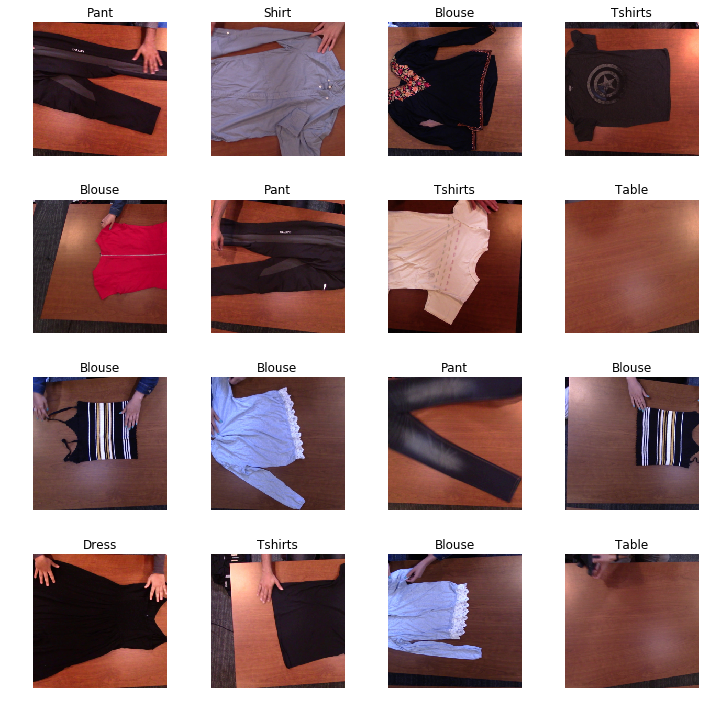

In [23]:
data.show_batch(figsize=(10,10))

In [24]:
learn=cnn_learner(data, models.resnet34, metrics=accuracy)

In [25]:
learn.freeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


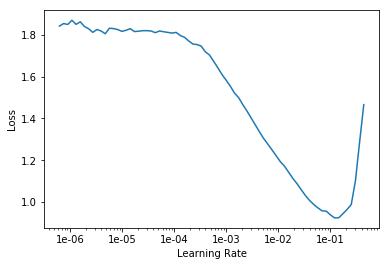

In [13]:
learn.recorder.plot()

In [27]:
lr=5e-2
learn.fit_one_cycle(4, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.140525,2.101602,0.756098,00:38
1,1.988780,4.008050,0.585366,00:37
2,2.163530,2.238347,0.780488,00:37
3,1.915195,1.537311,0.780488,00:38


In [31]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


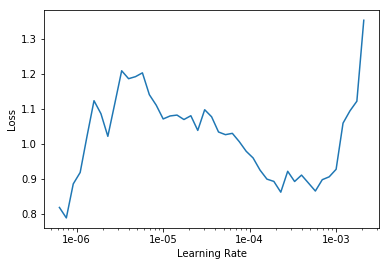

In [33]:
learn.recorder.plot()

In [34]:
lr=1e-4
learn.fit_one_cycle(8, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.864868,0.988046,0.829268,00:58
1,1.339757,0.638278,0.878049,00:58
2,1.155064,0.546156,0.878049,00:57
3,0.951333,0.364684,0.926829,00:57
4,0.852619,0.275597,0.926829,00:57
5,0.773490,0.243160,0.902439,00:57
6,0.760392,0.266059,0.951219,00:57
7,0.682903,0.302351,0.926829,00:57


In [35]:
interp=ClassificationInterpretation.from_learner(learn)

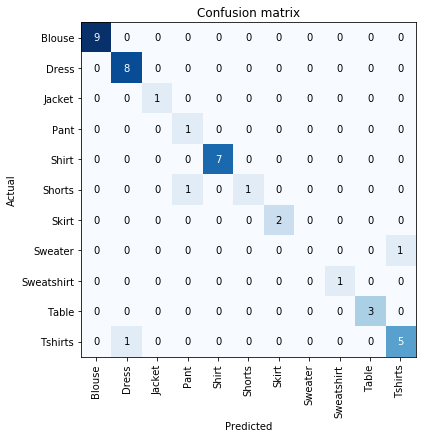

In [36]:
interp.plot_confusion_matrix(figsize=(6,6))

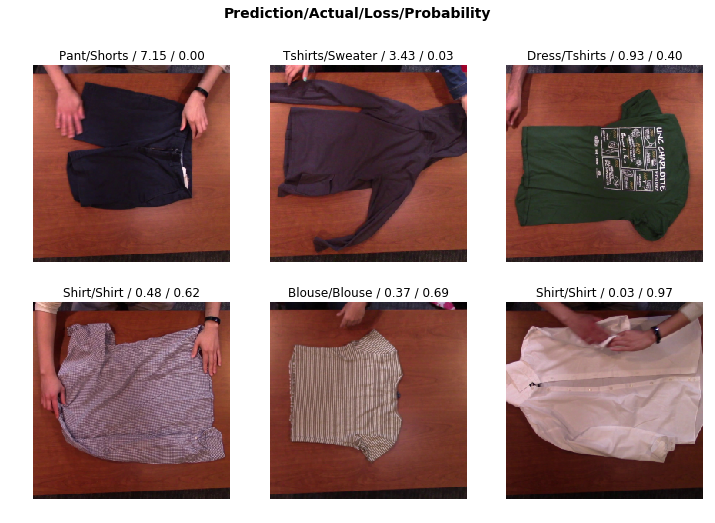

In [37]:
interp.plot_top_losses(k=6, figsize=(12, 8))